# Import required libraries and implement LinearRegression

In [74]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

class LinearRegression:
  def __init__(self, learning_rate=0.001, n_iters=1000):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape

    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias

      dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
      db = (1 / n_samples) * np.sum(y_pred - y)

      self.weights -= self.lr * dw
      self.bias -= self.lr * db

  def predict(self, X):
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred

# Fit the train data

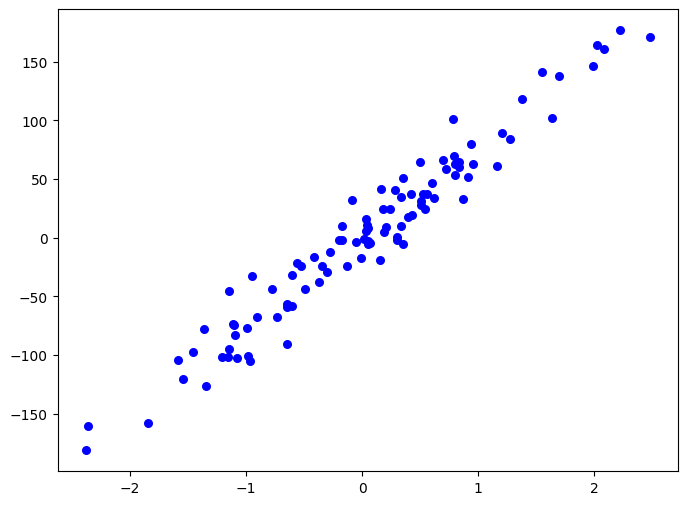

In [75]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, color="b", marker="o", s=30)
plt.show()

reg = LinearRegression(learning_rate=0.01)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

# Evaluate the Mean squared error

In [76]:
def mse(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)

mse_value = mse(y_test, predictions)
print(mse_value)

305.7719958301902


# Visualize

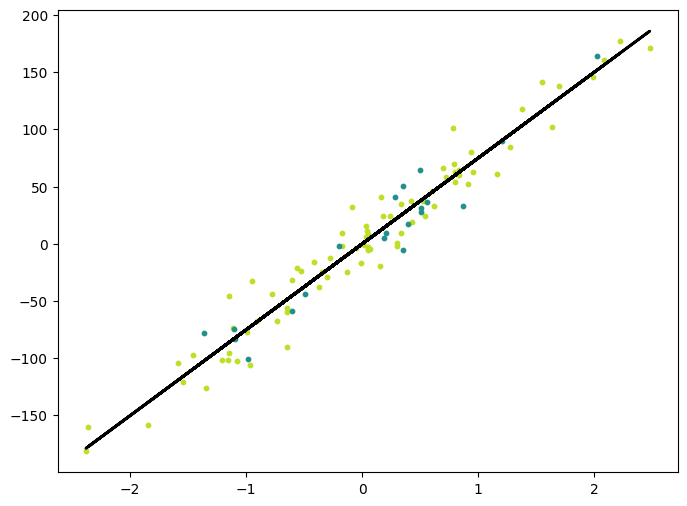

In [77]:
y_pred_line = reg.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.show()